# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!


In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
#Reading the ecommerce customers csv file in dataframe called customers
customers = pd.read_csv('Ecommerce Customers')

In [3]:
# Having a peep into the customers dataframe
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
#Checking the info of the customers dataframe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


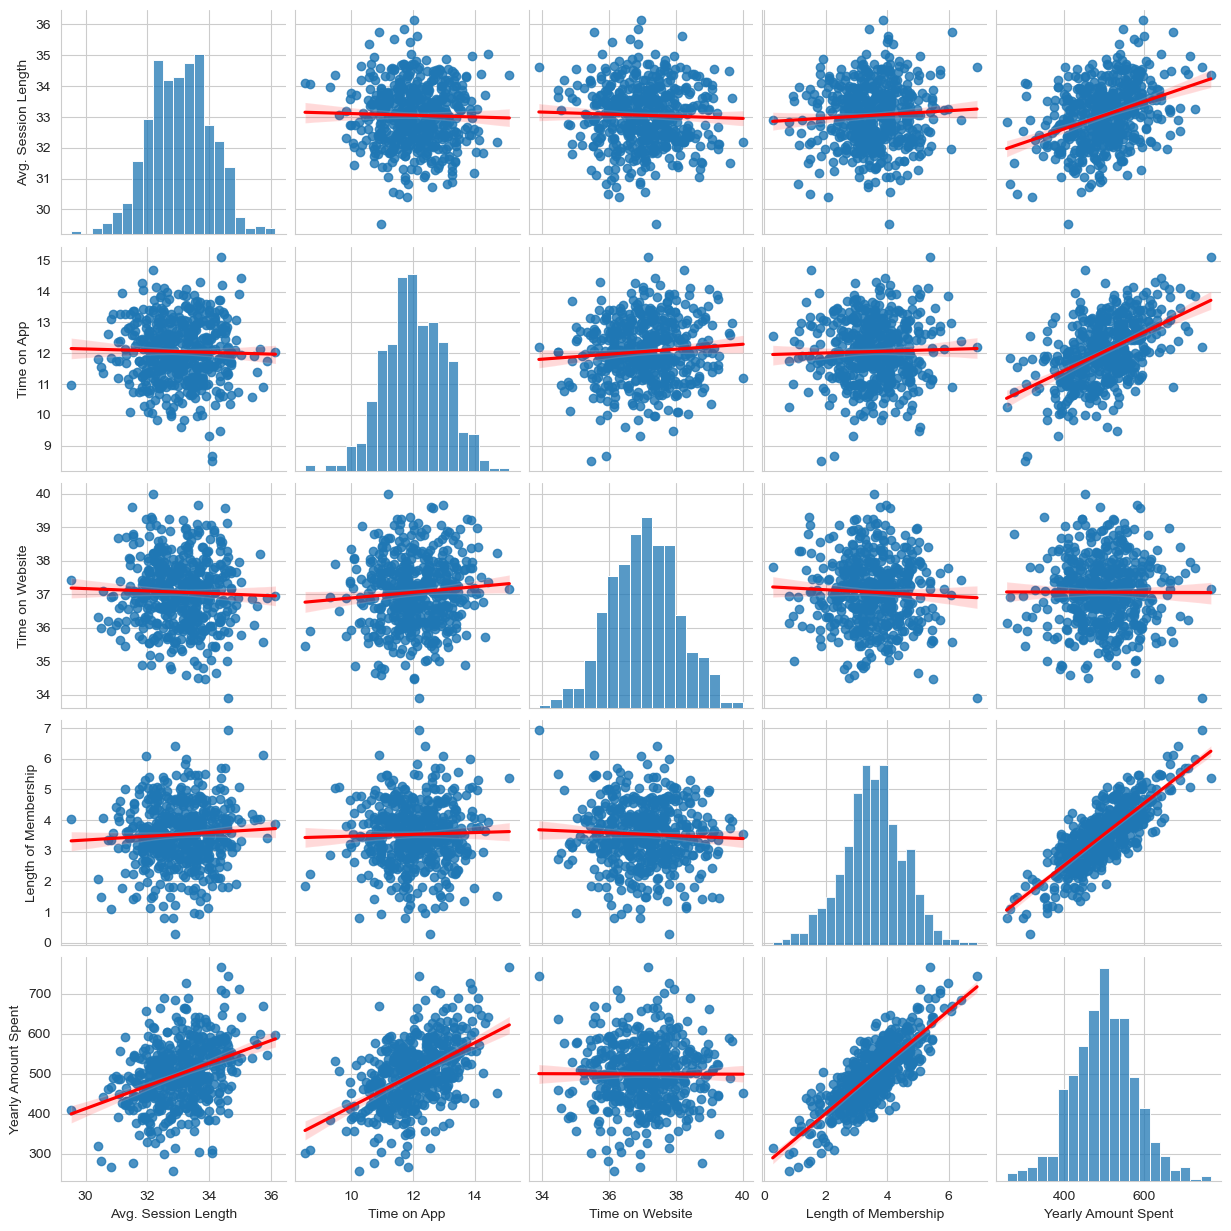

In [ ]:
#Creating a pairplot of the customers dataframe
sns.pairplot(customers, diag_kind='hist', kind='reg',
              plot_kws={'line_kws':{'color':'red'}})

#Observations:
#1. Length of Membership has a strong correlation with Yearly Amount Spent (which is obvious)
#2. Time on Website and Time on App also have a weak correlation
#3. Time on App and Yearly Amount Spent have a moderate correlation
#4. Time on Website and Yearly Amount Spent have a weak correlation
#5. Histograms of all the columns are also plotted, which shows 
# the distribution of the data is normal

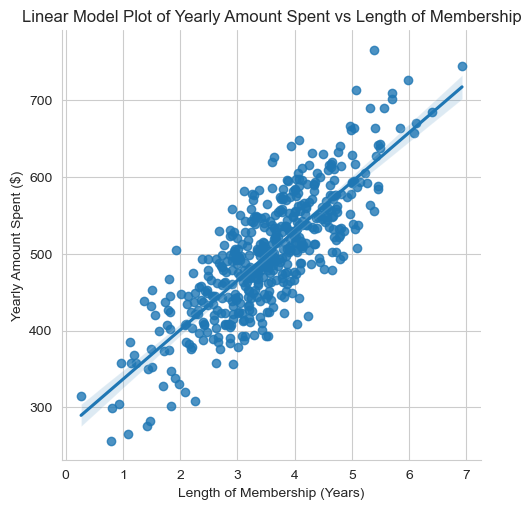

In [ ]:
#To further clarify, lets create a linear model plot between 
# Yearly Amount Spent and Length of Membership
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)
plt.title('Linear Model Plot of Yearly Amount Spent vs Length of Membership')
plt.xlabel('Length of Membership (Years)')
plt.ylabel('Yearly Amount Spent ($)')
plt.show()

#Strong linear relationship between Yearly Amount Spent and Length of Membership

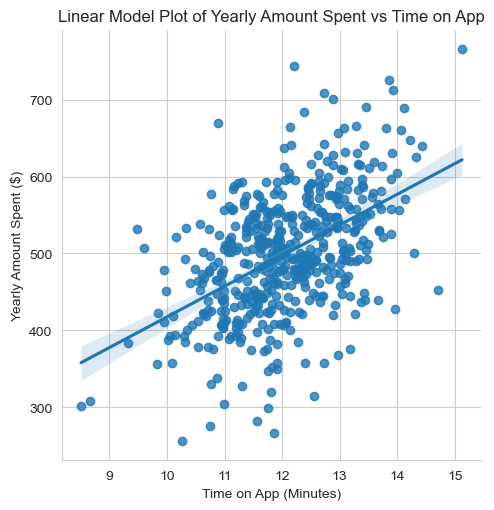

In [ ]:
# lmplot between yearly amount spent and time on app
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=customers)
plt.title('Linear Model Plot of Yearly Amount Spent vs Time on App')
plt.xlabel('Time on App (Minutes)')
plt.ylabel('Yearly Amount Spent ($)')
plt.show()

# Moderate linear relationship between Yearly Amount Spent and Time on App

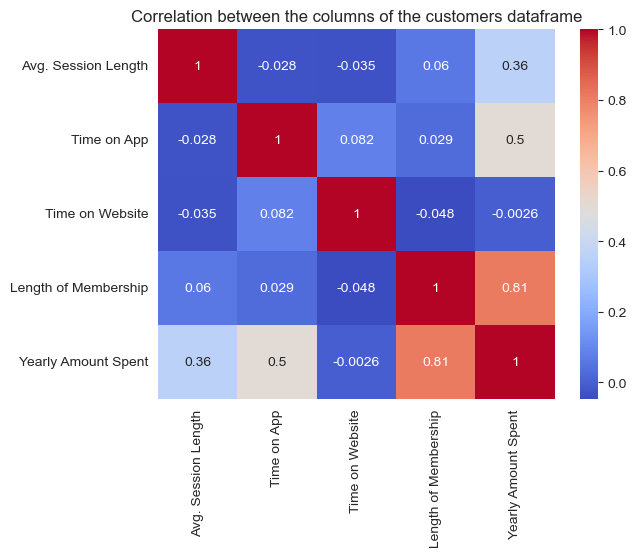

In [12]:
# Lets check the correlation between the columns of the customers dataframe
correlations = customers.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation between the columns of the customers dataframe')
plt.show()

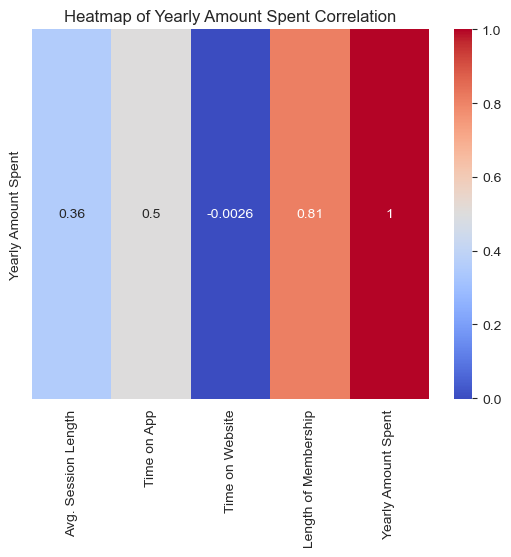

In [24]:
#correlation between Yearly Amount Spent and all other columns
sns.heatmap(pd.DataFrame(correlations['Yearly Amount Spent']).T, annot=True, cmap='coolwarm')
plt.title('Heatmap of Yearly Amount Spent Correlation')
plt.show()


Training and Testing Data

In [25]:
#Setting variable y for Yearly Amount Spent(Dependent Variable)
y = customers['Yearly Amount Spent']

In [51]:
#Setting variable X for all the columns except Email, Address, Avatar 
# and Yearly Amount Spent(Independent Variables)
numeric_columns = [feature for feature 
                   in customers.drop('Yearly Amount Spent',
                    axis = 1).columns if customers[feature].dtype != 'O']
X = customers[numeric_columns]



In [ ]:
#Splitting the data into training and testing sets
#importing the necessary library
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=101)

In [55]:
#Training the model
#importing the necessary library
from sklearn.linear_model import LinearRegression

In [56]:
#Creating an instance of the LinearRegression model
lm = LinearRegression()

In [57]:
#Training/fitting the model on the training data
lm.fit(X_train,y_train)


LinearRegression()

In [58]:
#Printing the coefficients of the model
print('Coefficients: \n', lm.coef_)
#Printing the intercept of the model
print('Intercept: \n', lm.intercept_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]
Intercept: 
 -1047.932782250239


In [60]:
coeff_names = X_train.columns
print(coeff_names)
#finding the coefficient names of the model

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')


In [ ]:
#The model is:
print("The model is: ")
print('Yearly Amount Spent = {}*{} + {}*{} + {}*{} + {}*{} + {}'.format(lm.coef_[0], coeff_names[0], 
                                                                        lm.coef_[1], coeff_names[1],
                                                                         lm.coef_[2], coeff_names[2],
                                                                         lm.coef_[3], coeff_names[3],
                                                                         lm.intercept_))


The model is: 
Yearly Amount Spent = 25.98154972349577*Avg. Session Length + 38.59015875311411*Time on App + 0.1904052775110138*Time on Website + 61.27909654482185*Length of Membership + -1047.932782250239


In [ ]:
#making predictions on the test data
predictions = lm.predict(X_test)

In [ ]:
predictions.shape, y_test.shape
#Examining the shapes of the predictions and y_test

((150,), (150,))

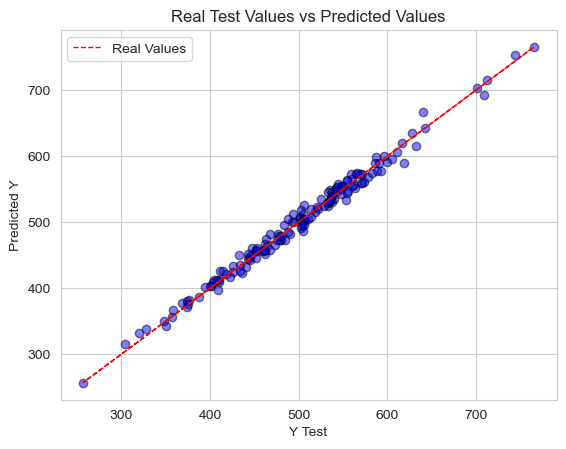

In [76]:
#Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test, predictions, color='blue', alpha=0.5, edgecolor='black',)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Real Test Values vs Predicted Values')


plt.plot(y_test, y_test, color='red', linewidth=1, linestyle='--', label='Real Values')
plt.legend()

plt.grid(True)
plt.show()

#The scatter plot shows that the model is doing a good job in predicting the values
#The predicted values are very close to the real values

Evaluating the Model by Calculating the following metrics:
* Residual Sum of Squares
* Explained Variance Score (R^2)
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error

In [ ]:
from sklearn import metrics
residual_sum_of_squares = np.sum((y_test - predictions)**2)
mean_absolute_error = metrics.mean_absolute_error(y_test, predictions)
mean_squared_error = metrics.mean_squared_error(y_test, predictions)
root_mean_squared_error = np.sqrt(mean_squared_error)
r2_score = metrics.r2_score(y_test, predictions)


In [ ]:
#Computing the p values of each coefficient to know if it is significant
#importing the necessary library
import statsmodels.api as sm
#Null Hypothesis: The coefficient is not significant
#Alternate Hypothesis: The coefficient is significant
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

#The p values of all the coefficients are less than 0.05, so we reject 
# the null hypothesis except for the Time on Website coefficient
# which is greater than 0.05, so we fail to reject the null hypothesis
#The Time on Website coefficient is not significant!

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     4641.
Date:                 Sat, 22 Feb 2025   Prob (F-statistic):          1.88e-298
Time:                         21:49:10   Log-Likelihood:                -1314.1
No. Observations:                  350   AIC:                             2638.
Df Residuals:                      345   BIC:                             2658.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1047.9328     28.509    -36.758      0.000   -1104.007    -991.859
Avg. Session Length     25.9815      0.557     46.657      0.000      24.886      27.077
Time on App             38.5902      0.590     65.411      0.000      37.430      39.751
Time on Website          0.1904      0.576      0.330      0.741      -0.943       1.324
Length of Membership    61.2791      0.568    107.923      0.000      60.162      62.396
==============================================================================
Omnibus:                        0.525   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.505
Skew:                          -0.092   Prob(JB):                        0.777
Kurtosis:                       2.977   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
metrics_dict ={"Residual Sum of Squares":residual_sum_of_squares,
               "Mean Absolute Error":mean_absolute_error,
               "Mean Squared Error":mean_squared_error,
               "Root Mean Squared Error":root_mean_squared_error,
               "R2 Score":r2_score}
(pd.DataFrame(metrics_dict, index=['Values']).T)

,Values
Residual Sum of Squares,11971.957748
Mean Absolute Error,7.228149
Mean Squared Error,79.813052
Root Mean Squared Error,8.933815
R2 Score,0.989005


R^2 = 0.98 implies that the model is explaining 98% of variation in Yearly Amount Spent

Dealing with Residuals:

Checking the Normality assumptions for residuals

In [91]:
#Computing residuals
residuals = (y_test - predictions)

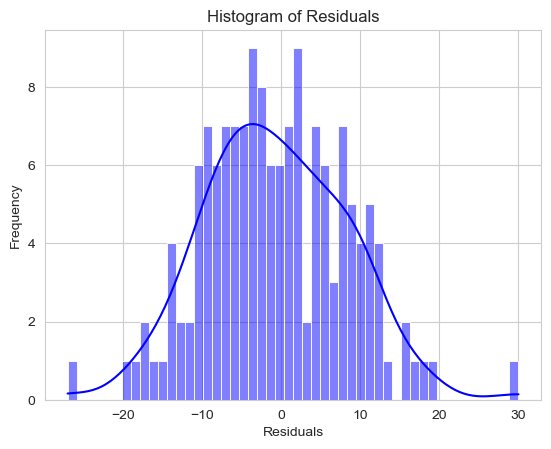

In [ ]:
#plotting a histogram of the residuals
sns.histplot(residuals, bins=50, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# The residuals are normally distributed, which is a good sign
# This means that the model is a good fit for the data
# The residuals are centered around 0

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [104]:
coefficients_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coefficients_df)

                      Coefficient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097


In [109]:
coefficients_df.loc['Avg. Session Length'].values[0]

25.98154972349577

In [116]:
#Interpreting the coefficients:
print('Interpreting the coefficients:')
for feature in X.columns:
    print(f'Holding all other features fixed, a 1 unit increase in {feature} is associated with an increase of $ {round(coefficients_df.loc[feature].values[0], 2)} in Yearly Amount Spent')


Interpreting the coefficients:
Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of $ 25.98 in Yearly Amount Spent
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of $ 38.59 in Yearly Amount Spent
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of $ 0.19 in Yearly Amount Spent
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of $ 61.28 in Yearly Amount Spent


# WHAT SHOULD THE COMPANY FOCUS MORE ON? Mobile App or on Website improvement?

1. Improve the website so that its performace catches up with the App's
2. Develop the App further as it seems to work for it better

Probably an analysis of relationship between Website,App and Length of Membership can help us to suggest better.

In [117]:
# Lets do a regression analysis between Time on App, 
# Time on Website and Length of Membership
X2 = customers[['Time on App',  'Time on Website']]
y2 = customers['Length of Membership']

In [118]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3,
                                                 random_state=101)

In [119]:
#fitting the model
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()

In [120]:
lm2.fit(X2_train,y2_train) #fitting the model

LinearRegression()

In [121]:
#Making predictions on the test data
predictions2 = lm2.predict(X2_test)

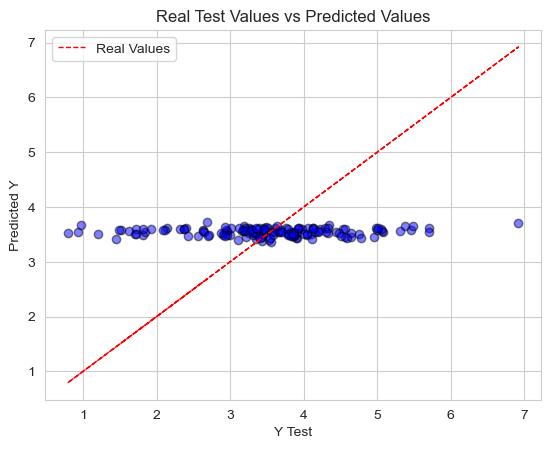

In [ ]:
#plotting the real test values vs the predicted values
plt.scatter(y2_test, predictions2, color='blue', alpha=0.5, edgecolor='black',)
plt.plot(y2_test, y2_test, color='red', linewidth=1, linestyle='--', label='Real Values')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Real Test Values vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
#Arghh! The model is not doing a good job in predicting the values

In [127]:
# Lets compute its R2 score
from sklearn import metrics  # ensure metrics is imported
r2_score2 = metrics.r2_score(y2_test, predictions2)
print("R2 Score:", r2_score2)
print(f"Only {round(r2_score2*100,2)}% of the variance in the target variable is explained by the model") 

R2 Score: 0.0017368252238220139
Only 0.17% of the variance in the target variable is explained by the model


In [ ]:
#computing p-values for all coefficients
import statsmodels.api as sm
X2_train = sm.add_constant(X2_train)
model2 = sm.OLS(y2_train, X2_train).fit()
model2.summary()
#the p-values of the coefficients are more than 0.05, so we 
# accept the null hypothesis that no coefficient is significant
# The model is not a good fit for the


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Length of Membership   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.6484
Date:                  Sat, 22 Feb 2025   Prob (F-statistic):              0.523
Time:                          21:54:33   Log-Likelihood:                -489.77
No. Observations:                   350   AIC:                             985.5
Df Residuals:                       347   BIC:                             997.1
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.0744      2.065      2.457      0.014       1.012       9.137
Time on App         0.0372      0.056      0.668      0.504      -0.072       0.147
Time on Website    -0.0534      0.054     -0.981      0.327      -0.160       0.054
==============================================================================
Omnibus:                        1.163   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                0.915
Skew:                          -0.087   Prob(JB):                        0.633
Kurtosis:                       3.180   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hence, no linear relationship of significant statistical value could be established between y= Length of Membership and X=(Time on App, Time on Website). Moreover, the time on website was also statistically insignificant on the Yearly Amount Spent. So niether can we increase the Length of Membership by improving on the website, nor can we enhance the yearly amount spent by improving on it.

# Conclusion:
* Company should focus on App improvement.